In [1]:
import pandas as pd

In [9]:
#Load USDA database & transform it into the form we need
food_database = pd.read_excel("2019-2020 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", 
                              header = 1 #set column headers
                              )


,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.0,0.026,0.000,0.000,0.000,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,...,0.002,0.000,0.074,0.008,0.0,0.003,0.000,0.001,0.000,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,...,0.004,0.000,0.115,0.013,0.0,0.004,0.001,0.002,0.000,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,...,0.002,0.000,0.061,0.007,0.0,0.003,0.000,0.001,0.000,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,...,0.001,0.000,0.033,0.004,0.0,0.001,0.000,0.000,0.000,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,...,0.000,0.000,0.089,0.004,0.0,0.000,0.000,0.000,0.000,92.57
5620,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food category,39,3.25,5.74,2.73,1.4,0.39,...,0.000,0.000,0.174,0.001,0.0,0.000,0.000,0.000,0.000,89.67
5621,99997810,Vegetables as ingredient in curry,9999,Not included in a food category,52,1.81,11.60,3.25,2.2,0.19,...,0.000,0.000,0.052,0.012,0.0,0.000,0.000,0.000,0.000,85.59
5622,99998130,Sauce as ingredient in hamburgers,9999,Not included in a food category,272,1.34,17.14,13.08,0.6,22.85,...,0.106,0.133,11.810,1.682,0.0,0.015,0.000,0.000,0.002,55.97


Current thought:
- amount of foods are inputs
- quality rates are weights (e.g., amount of calories per 100gs)

In [37]:
#very basic prototype optimization algorithm

import numpy as np
import matplotlib.pyplot as plt

#intialzie amounts
amounts = np.array([[1.0,1.0]])

#rows represent food, cols represent qualities
quality_rates = np.array([[1,2,.5],
                          [1,2,2]])

learning_rate = .001

#goal amounts
targets = [5,10,8]

outputs, errors, amountss = [], [], []

stop_time = 1000
for i in range(stop_time):
    output = np.dot(amounts, quality_rates)
    outputs.append(output)
    #squared error is the loss function
    error = (output - targets)**2
    errors.append(error)
    #derivative of loss wrt to output
    dloss = 2*(output - targets)
    #print(dloss)

    dmax = targets.copy
    dmax = np.ones_like(output)
    dmax[output >= targets] = 0 
    #print(dmax)

    dfoods = dloss * dmax
    #print(dfoods)

    #deriv wrt amounts is quality rate
    dinputs = np.dot(dfoods, quality_rates.T)
    #print(dinputs)

    amounts += -learning_rate * dinputs
    amountss.append(amounts)


print(amounts)
print(output)
print(error)

[[2.27147371 3.43186411]]
[[ 5.70333513 11.40667026  7.9994605 ]]
[[4.94680305e-01 1.97872122e+00 2.91059849e-07]]


How to fully implement for food
- we are going to minimize cost, while trying to meet thresholds for other items

In [251]:
import pandas as pd
import numpy as np
food_data = pd.read_excel(r"C:\Users\Chris\Desktop\Diet Data\Diet Optimization.xlsx", sheet_name="For Python Test")

In [252]:
quality_rates = food_data.iloc[0:20,6:].to_numpy()

In [253]:
target_values = food_data.iloc[24:,2].to_numpy().astype(float).reshape(1,-1)

In [254]:
food_limits = food_data.iloc[24:44,6].to_numpy().reshape(1,-1)

In [258]:
food_req = food_data.iloc[24:44,9].to_numpy().reshape(1,-1)

In [331]:
amounts = np.random.rand(1,20) * 1000
learning_rate = .000001
errors = []

for i in range(10000):
    outputs = np.dot(amounts, quality_rates)
    error = (outputs - target_values)**2
    errors.append(np.mean(error))

    dloss = 2*(outputs - target_values)
    dmax = np.ones_like(outputs)

    #we are looking to hit calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    dmax[outputs[2:] >= target_values[2:]] = 0.0
    dfoods = dloss * dmax
    
    dinputs = np.dot(dfoods, quality_rates.T)

    amounts += -learning_rate * dinputs.astype(float)
    amounts[amounts < food_req] = food_req[amounts < food_req]
    amounts[amounts > food_limits] = food_limits[amounts > food_limits]

print(np.dot(amounts, quality_rates))

[[15.387917934317144 2157.173101455662 202.82936117338636
  79.08410319239611 161.0104790710118 32.106824970791095
  1009.7260832359703 409.7959806119521 1337.2 9.113 5.233753819823789
  262.075 21.489999999999995 20.014784549559476 694.1107423031985
  1.5976871265274886 11.978315564116096 640.4868072878767
  13.292345438756964 2728.9958836717124 238.31266190911762
  4745.087531339783 3255.280735419464 630.4950416179851
  1.6640417616596463 3.3056512428557765 58.961653893396914
  2.772244538191918]]


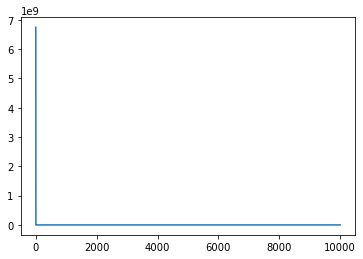

In [327]:
import matplotlib.pyplot as plt

plt.plot(errors[:])
plt.show()

In [328]:
amounts

array([[3.  , 0.3 , 0.3 , 5.  , 1.5 , 1.  , 0.5 , 1.5 , 0.25, 0.5 , 0.5 ,
        0.5 , 0.5 , 0.1 , 1.4 , 1.  , 2.1 , 0.1 , 2.3 , 0.21]])

Notes:
- there seems to be a couple of local minimums, depending on the learning rate that we choose
- none of them are as good as the excel solver
- maybe there is a better way to adjust learning rate or something as error decreases